In [1]:
import torch
from torch import nn
from torch.nn import functional as F

"""
GoogLeNet是一种含有并行联结结构的卷积神经网络
"""
class Inception(nn.Module):
    # c1-c4是每条路径的输出通道数
    def __init__(self, in_channels, c1, c2, c3, c4, **kwargs):
        super().__init__(**kwargs)
        # 线路1，单1 x 1卷积层
        self.p1_1 = nn.Conv2d(in_channels, c1, kernel_size=1)
        # 线路2，1 x 1卷积层后接3 x 3卷积层
        self.p2_1 = nn.Conv2d(in_channels, c2[0], kernel_size=1)
        self.p2_2 = nn.Conv2d(c2[0], c2[1], kernel_size=3, padding=1)
        # 线路3，1 x 1卷积层后接5 x 5卷积层
        self.p3_1 = nn.Conv2d(in_channels, c3[0], kernel_size=1)
        self.p3_2 = nn.Conv2d(c3[0], c3[1], kernel_size=5, padding=2)
        # 线路4，3 x 3最大池化层后接1 x 1卷积层
        self.p4_1 = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.p4_2 = nn.Conv2d(in_channels, c4, kernel_size=1)

    def forward(self, x):
        p1 = F.relu(self.p1_1(x)) # 线路1
        p2 = F.relu(self.p2_2(F.relu(self.p2_1(x)))) # 线路2
        p3 = F.relu(self.p3_2(F.relu(self.p3_1(x)))) # 线路3
        p4 = F.relu(self.p4_2(self.p4_1(x))) # 线路4
        return torch.cat((p1, p2, p3, p4), dim=1)

# 实现GoogLeNet的每个模块
block1 = nn.Sequential(
        nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2, padding=1)) # 第一个模块使用64个通道, 7*7卷积层。
block2 = nn.Sequential(
        nn.Conv2d(64, 64, kernel_size=1),
        nn.ReLU(),
        nn.Conv2d(64, 192, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2, padding=1)) # 第二个块使用两个卷积层,64个通道,1*1卷积层；和3*3卷积层, 192通道。对应于Inception块中的第二条路径



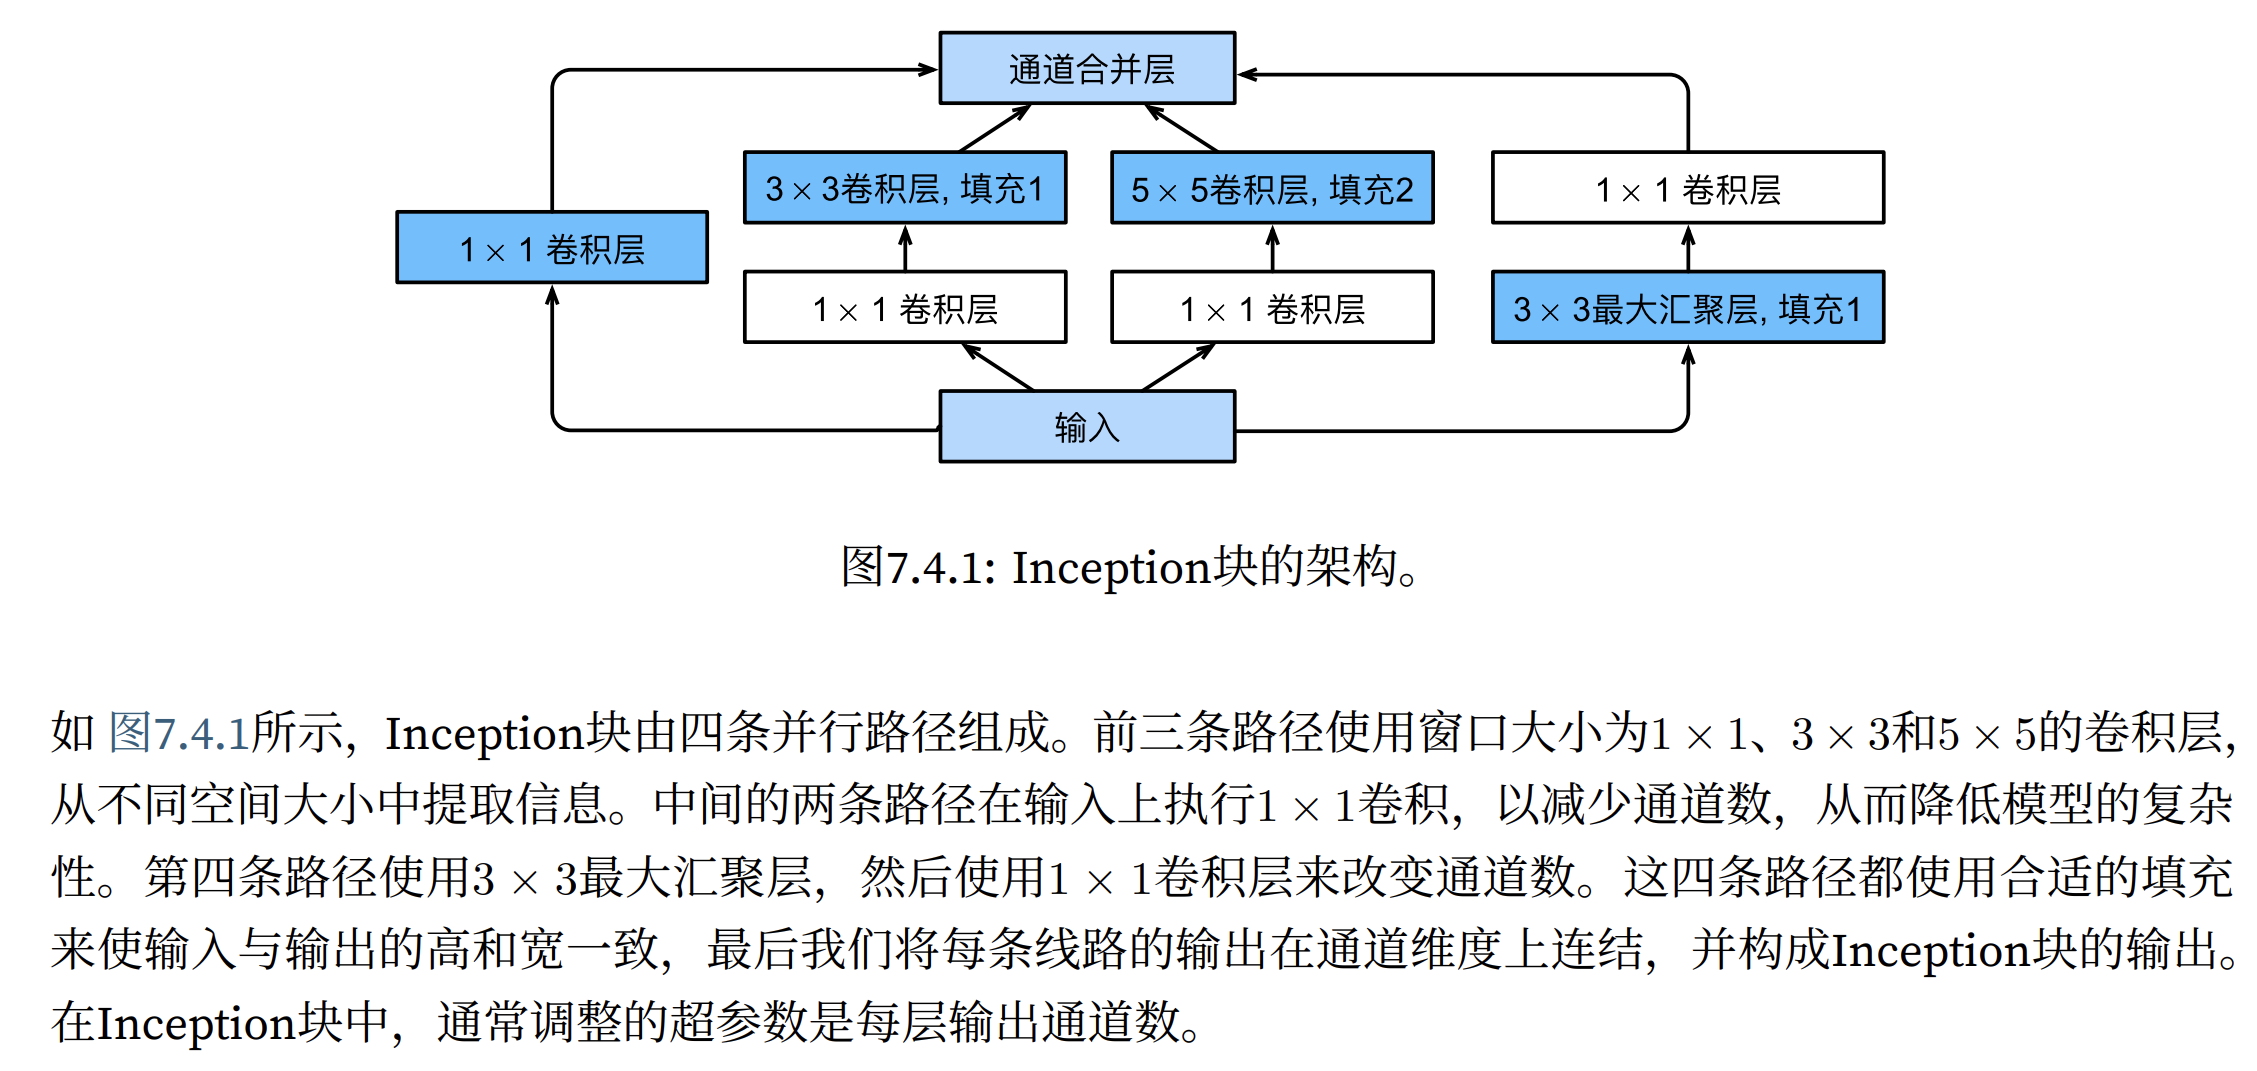

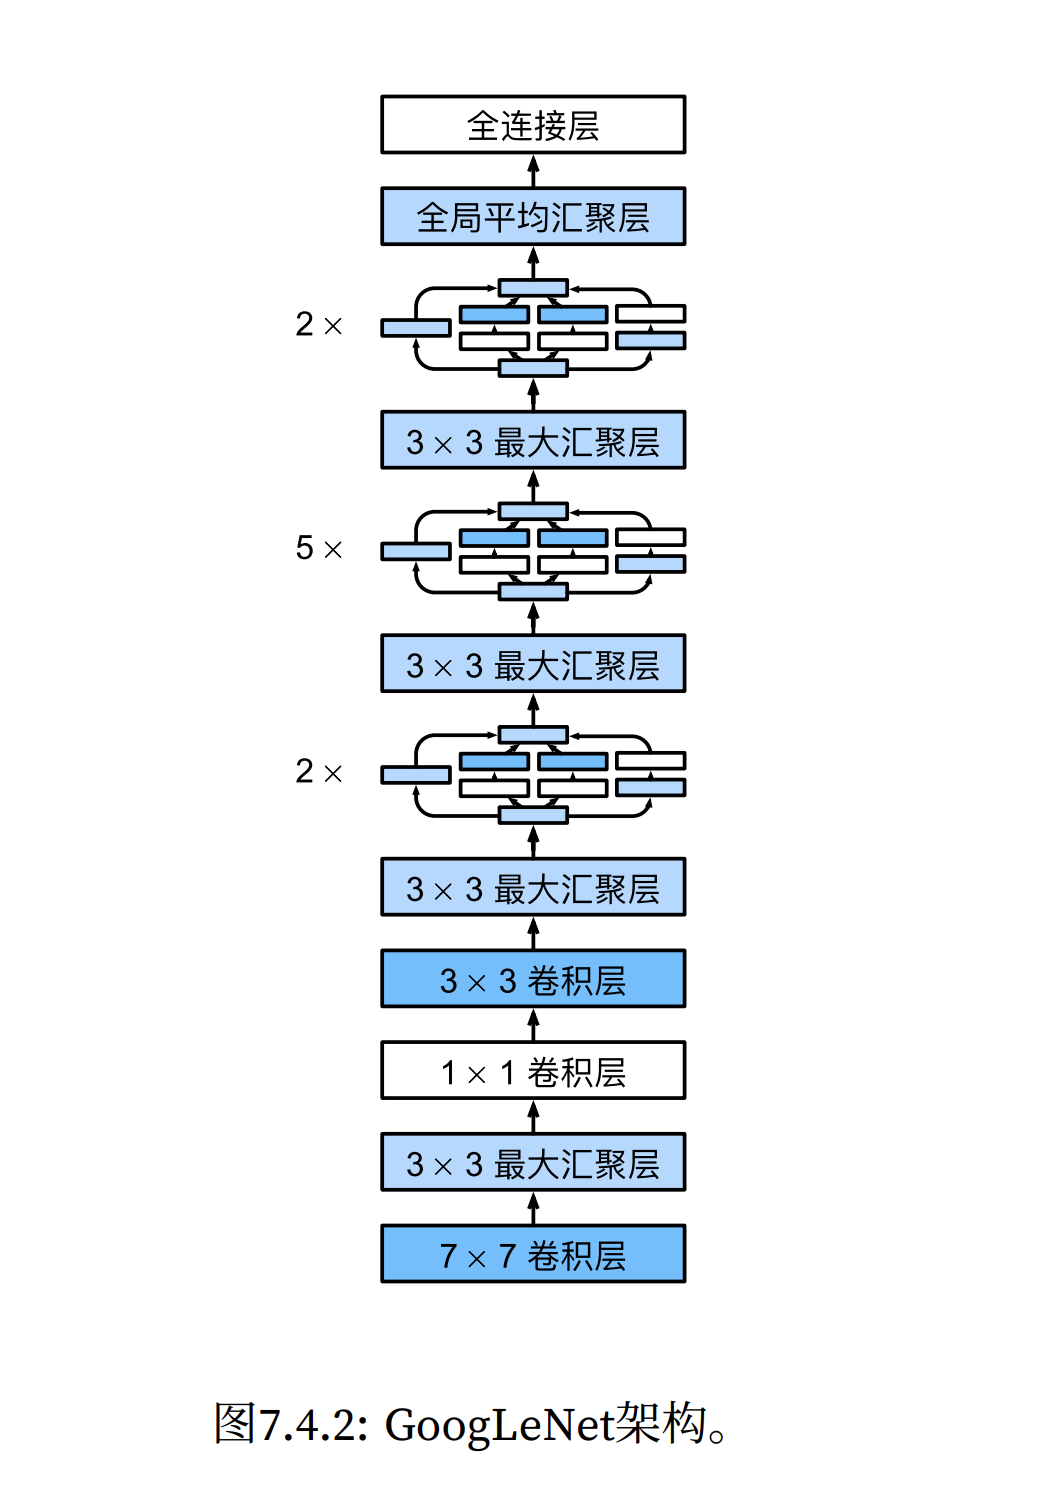